Importing the Libraries

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Loading the Dataset:

In [58]:
data = sns.load_dataset('penguins')

Filtering the Dataset:

In [59]:
data = data[data['species'].isin(['Adelie', 'Gentoo'])]

Handling Missing Data:

In [60]:
data = data.dropna()

Selecting and Encoding Features and Target:

In [61]:
# Select features and target variable
X = data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = data['species']

# Encode the target variable
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


Splitting the Dataset:

In [62]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the training and test sets
print("Shape of Training Set (X_train, y_train):", X_train.shape, y_train.shape)
print("Shape of Test Set (X_test, y_test):", X_test.shape, y_test.shape)

Shape of Training Set (X_train, y_train): (185, 4) (185,)
Shape of Test Set (X_test, y_test): (80, 4) (80,)


Initializing, Training and testing the models

In [63]:
# Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluate and compare accuracy
acc_nb = accuracy_score(y_test, y_pred_nb)
acc_lr = accuracy_score(y_test, y_pred_lr)

print(f"\nNaive Bayes Accuracy: {acc_nb:.2f}")
print(f"Logistic Regression Accuracy: {acc_lr:.2f}")

# Classification reports
print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb, target_names=label_encoder.classes_))

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr, target_names=label_encoder.classes_))


Naive Bayes Accuracy: 1.00
Logistic Regression Accuracy: 1.00

Naive Bayes Classification Report:
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        35

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80


Logistic Regression Classification Report:
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        35

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Generating AUC and ROC curve

Naive Bayes AUC: 1.00
Logistic Regression AUC: 1.00


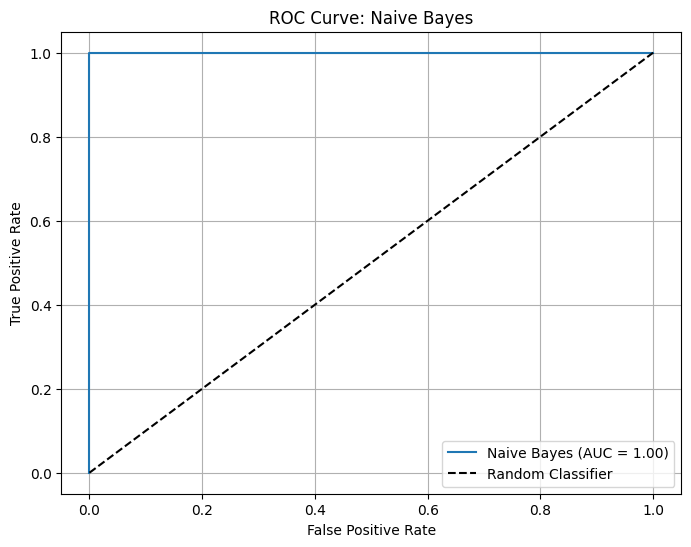

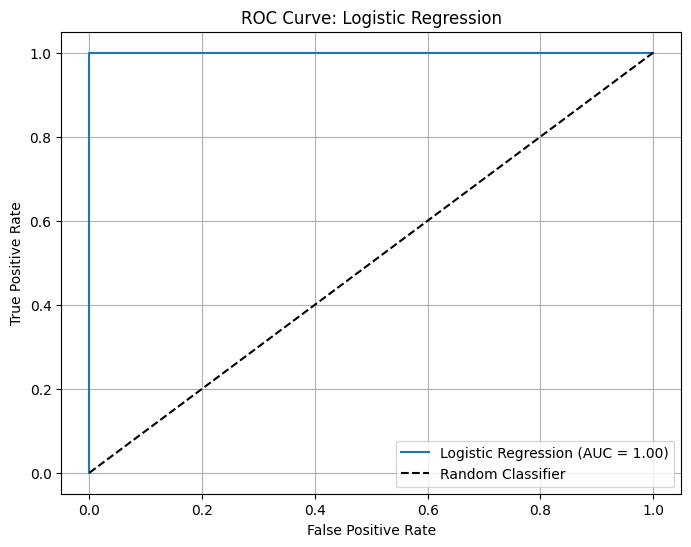

In [64]:

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt


nb_probs = nb_model.predict_proba(X_test)[:, 1]
lr_probs = lr_model.predict_proba(X_test)[:, 1]

# Calculating AUC for both models
auc_nb = roc_auc_score(y_test, nb_probs)
auc_lr = roc_auc_score(y_test, lr_probs)

print(f"Naive Bayes AUC: {auc_nb:.2f}")
print(f"Logistic Regression AUC: {auc_lr:.2f}")

# Generating ROC curve values
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_probs)
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)

# Ploting ROC curve for Naive Bayes
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Naive Bayes')
plt.legend()
plt.grid()
plt.show()

# Ploting ROC curve for Logistic Regression
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Logistic Regression')
plt.legend()
plt.grid()
plt.show()


Plotting gain/lift chart

<ipython-input-65-aa2db789d358>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decile_data = data.groupby('decile').agg(
<ipython-input-65-aa2db789d358>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decile_data = data.groupby('decile').agg(


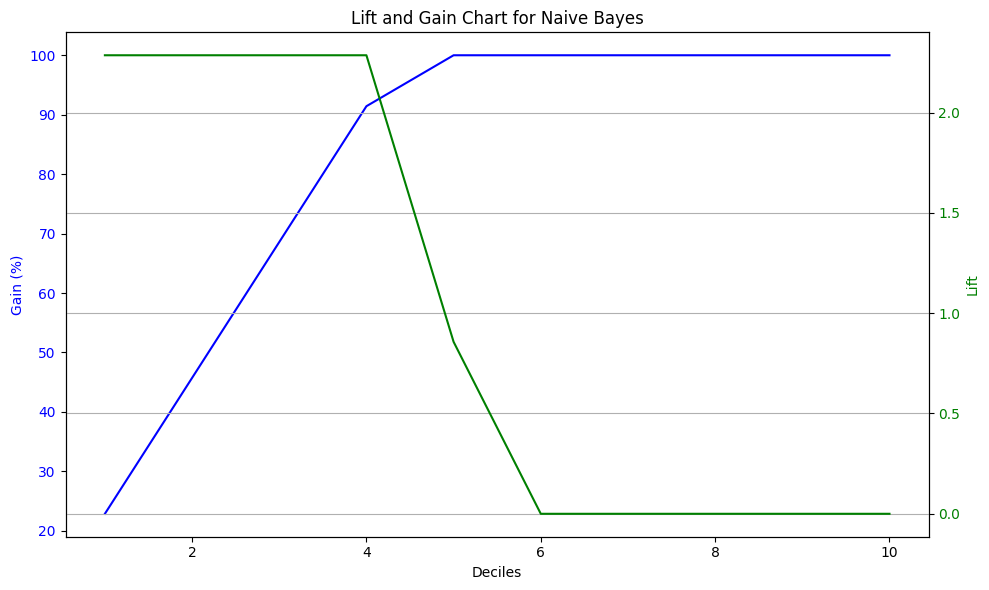

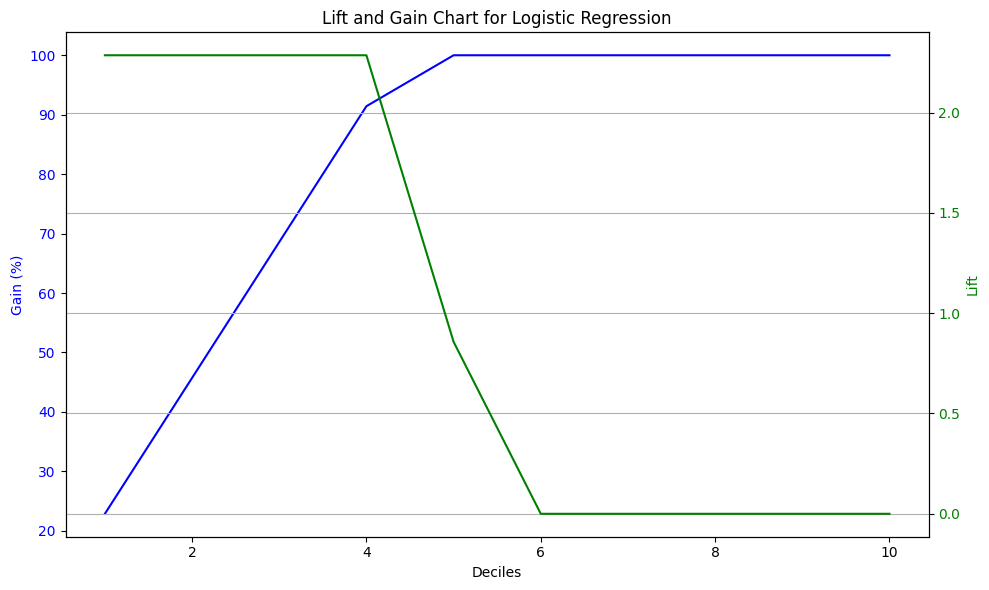

In [65]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

def calculate_lift_gain(y_true, y_probs, n_deciles=10):
    data = pd.DataFrame({'actual': y_true, 'probs': y_probs})
    data = data.sort_values(by='probs', ascending=False).reset_index(drop=True)

    data['decile'] = pd.qcut(data.index + 1, n_deciles, labels=np.arange(1, n_deciles + 1))

    total_positives = data['actual'].sum()
    decile_data = data.groupby('decile').agg(
        positives=('actual', 'sum'),
        count=('actual', 'count')
    ).reset_index()
    decile_data['cumulative_positives'] = decile_data['positives'].cumsum()
    decile_data['gain'] = decile_data['cumulative_positives'] / total_positives * 100
    decile_data['lift'] = decile_data['positives'] / (total_positives / n_deciles)

    return decile_data[['decile', 'gain', 'lift']]

nb_probs = nb_model.predict_proba(X_test)[:, 1]
lr_probs = lr_model.predict_proba(X_test)[:, 1]

nb_lift_gain = calculate_lift_gain(y_test, nb_probs)
lr_lift_gain = calculate_lift_gain(y_test, lr_probs)

def plot_lift_gain(decile_data, model_name):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    ax1.plot(decile_data['decile'], decile_data['gain'], color='b', label='Gain (%)')
    ax1.set_xlabel('Deciles')
    ax1.set_ylabel('Gain (%)', color='b')
    ax1.tick_params(axis='y', labelcolor='b')

    ax2 = ax1.twinx()
    ax2.plot(decile_data['decile'], decile_data['lift'], color='g', label='Lift')
    ax2.set_ylabel('Lift', color='g')
    ax2.tick_params(axis='y', labelcolor='g')
    plt.title(f'Lift and Gain Chart for {model_name}')
    fig.tight_layout()
    plt.grid()
    plt.show()

# Plot for Naive Bayes
plot_lift_gain(nb_lift_gain, 'Naive Bayes')

# Plot for Logistic Regression
plot_lift_gain(lr_lift_gain, 'Logistic Regression')


**Model Accuracy**

Both Naive Bayes and Logistic Regression achieved perfect accuracy of 100% on the Penguins dataset, distinguishing between the species Adelie and Gentoo without any errors. The classification reports for both models confirm this, with precision, recall, and F1-scores of 1.00 across the board for both species. These results indicate that the features (such as bill length and flipper length) are highly effective in separating these two species, making the classification task relatively simple for both models.

**AUC (Area Under the ROC Curve)**

The AUC values for both Naive Bayes and Logistic Regression were also 1.00, meaning both models perfectly distinguish between the two species. This reinforces the conclusion that the Penguins dataset provides well-separated classes, enabling both models to perform at their best.

**Lift and Gain Charts**

The Lift and Gain charts for both models reflect their perfect classification:

The Lift for both models is highest in the first few deciles, demonstrating that both models prioritize positive cases effectively right from the start.
The Gain curves show that 100% of the positive cases are captured early, confirming the efficiency of both models in ranking and classifying the two species.

**Conclusion for Penguins Dataset**

The Penguins dataset, with its clear and well-separated features, proved to be an easy classification task for both Naive Bayes and Logistic Regression. Both models achieved 100% accuracy, with precision, recall, and F1-scores of 1.00 for both Adelie and Gentoo species. In this case, the dataset's simplicity allowed both Naive Bayes and Logistic Regression to perform equally well, showing no meaningful difference in their performance. This highlights that when features are clearly separable, even a simpler model like Naive Bayes can perform as effectively as a more robust model like Logistic Regression.


************************************************************************************************

Implementing the models on MNIST dataset

In [66]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Importing the dataset

In [67]:
mnist = fetch_openml('mnist_784', version=1)


Selecting only 0's and 5's from the dataset for our analysis

In [68]:
X = mnist.data
y = mnist.target.astype('int')
mask = (y == 0) | (y == 3)
X = X[mask]
y = y[mask]

Splitting the data set to 80:20

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Implementing Guassian and Logistic modelss

In [71]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

In [72]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [73]:
# Results for Naive Bayes
acc_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {acc_nb:.2f}")
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

# Results of Logistic Regression
acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {acc_lr:.2f}")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))


Naive Bayes Accuracy: 0.93
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1380
           3       0.99      0.89      0.93      1429

    accuracy                           0.93      2809
   macro avg       0.94      0.94      0.93      2809
weighted avg       0.94      0.93      0.93      2809

Logistic Regression Accuracy: 0.99
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1380
           3       0.99      0.99      0.99      1429

    accuracy                           0.99      2809
   macro avg       0.99      0.99      0.99      2809
weighted avg       0.99      0.99      0.99      2809



AUC-ROC calculations for the models


Naive Bayes AUC: 0.98
Logistic Regression AUC: 1.00


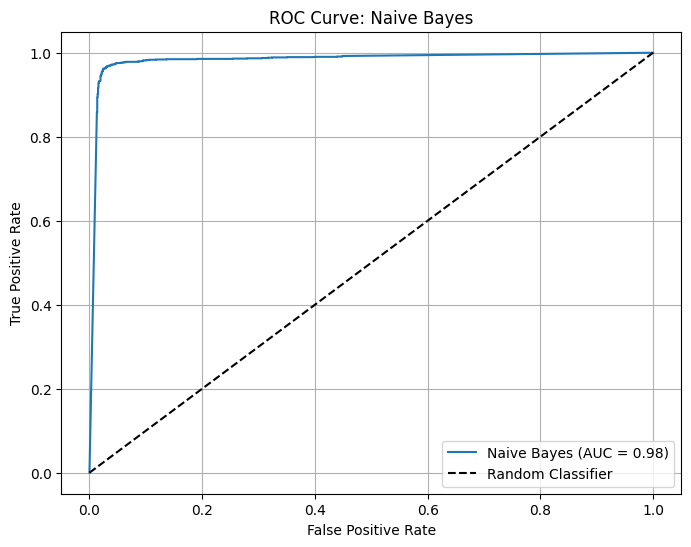

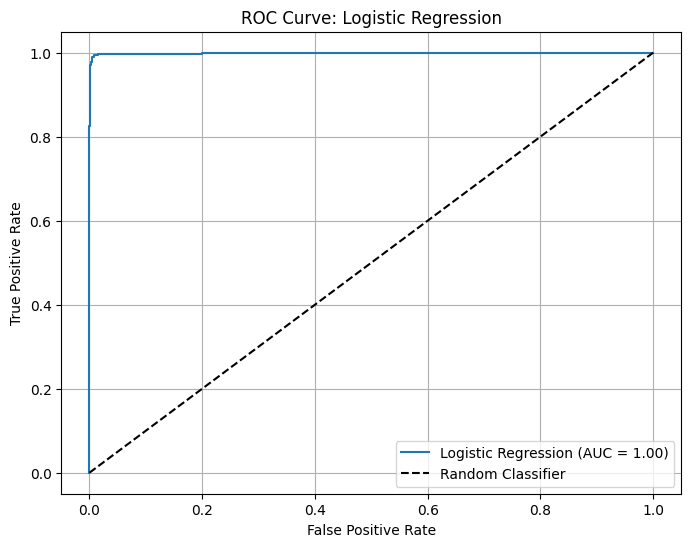

In [74]:
nb_probs = nb_model.predict_proba(X_test)[:, 1]
lr_probs = lr_model.predict_proba(X_test)[:, 1]

auc_nb = roc_auc_score(y_test, nb_probs)
auc_lr = roc_auc_score(y_test, lr_probs)

print(f"Naive Bayes AUC: {auc_nb:.2f}")
print(f"Logistic Regression AUC: {auc_lr:.2f}")

# ROC Curves
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_probs, pos_label=3)
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs, pos_label=3)

# Plotting ROC Curve for Naive Bayes
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Naive Bayes')
plt.legend()
plt.grid()
plt.show()

# Plotting ROC Curve for Logistic Regression
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Logistic Regression')
plt.legend()
plt.grid()
plt.show()


Lift and Gain chart for MNIST dataset

<ipython-input-75-087e8b33fb33>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decile_data = data.groupby('decile').agg(
<ipython-input-75-087e8b33fb33>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decile_data = data.groupby('decile').agg(


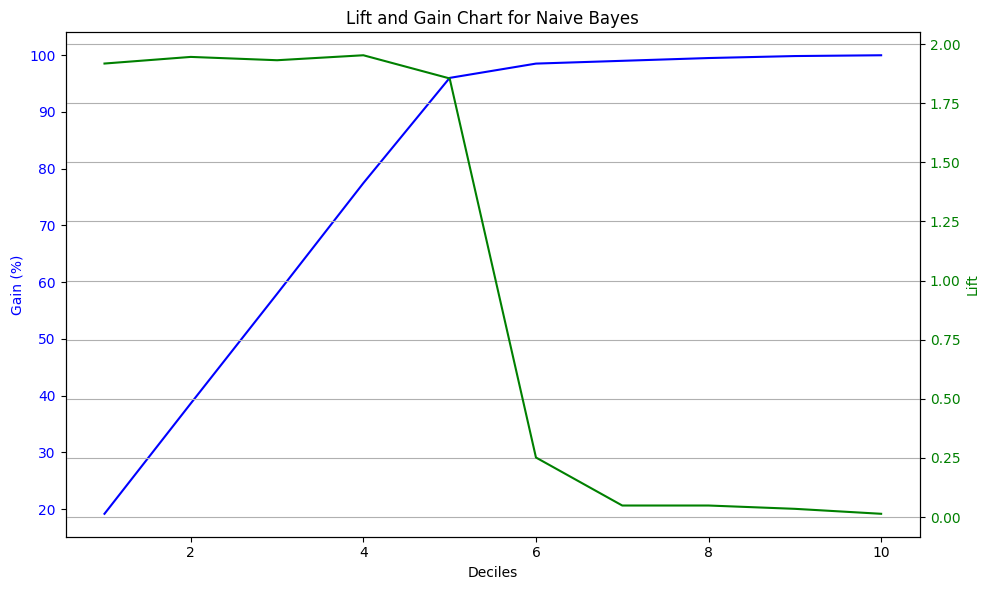

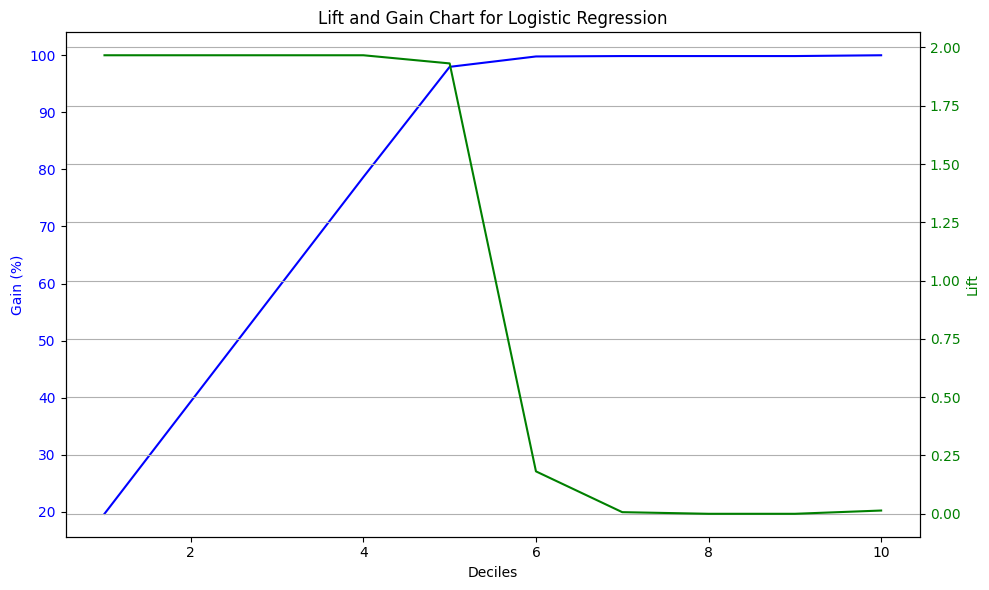

In [75]:
def calculate_lift_gain(y_true, y_probs, n_deciles=10):
    data = pd.DataFrame({'actual': y_true, 'probs': y_probs})
    data = data.sort_values(by='probs', ascending=False).reset_index(drop=True)

    data['decile'] = pd.qcut(data.index + 1, n_deciles, labels=np.arange(1, n_deciles + 1))
    total_positives = data['actual'].sum()
    decile_data = data.groupby('decile').agg(
        positives=('actual', 'sum'),
        count=('actual', 'count')
    ).reset_index()
    decile_data['cumulative_positives'] = decile_data['positives'].cumsum()
    decile_data['gain'] = decile_data['cumulative_positives'] / total_positives * 100
    decile_data['lift'] = decile_data['positives'] / (total_positives / n_deciles)

    return decile_data[['decile', 'gain', 'lift']]

nb_lift_gain = calculate_lift_gain(y_test, nb_probs)
lr_lift_gain = calculate_lift_gain(y_test, lr_probs)
def plot_lift_gain(decile_data, model_name):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    ax1.plot(decile_data['decile'], decile_data['gain'], color='b', label='Gain (%)')
    ax1.set_xlabel('Deciles')
    ax1.set_ylabel('Gain (%)', color='b')
    ax1.tick_params(axis='y', labelcolor='b')

    ax2 = ax1.twinx()
    ax2.plot(decile_data['decile'], decile_data['lift'], color='g', label='Lift')
    ax2.set_ylabel('Lift', color='g')
    ax2.tick_params(axis='y', labelcolor='g')

    plt.title(f'Lift and Gain Chart for {model_name}')
    fig.tight_layout()
    plt.grid()
    plt.show()

# Lift and Gain Chart for Naive Bayes
plot_lift_gain(nb_lift_gain, 'Naive Bayes')

# Lift and Gain Chart for Logistic Regression
plot_lift_gain(lr_lift_gain, 'Logistic Regression')

**Model Accuracy**

Naive Bayes achieved an accuracy of 93%. It performed exceptionally well for digit 0, with a precision of 89% and recall of 99%, indicating that most 0s were correctly identified. However, it struggled slightly with digit 3, where precision was 99%, but recall dropped to 89%, meaning some 3s were misclassified as 0s. This performance highlights the limitations of Naive Bayes in handling the complex relationships between pixel features, as it relies on the assumption of feature independence.

Logistic Regression, on the other hand, achieved an outstanding accuracy of 99%, handling the relationships between pixel features with ease. It performed equally well for both digits 0 and 3, with precision and recall values consistently around 99%, making it a much more reliable model for this dataset.

**AUC (Area Under the ROC Curve)**

The AUC for Naive Bayes was 0.98, which indicates it has a strong ability to rank positive cases (digit 3) correctly. However, this doesn’t fully compensate for its lower recall for digit 3. In contrast, Logistic Regression achieved a perfect AUC of 1.00, meaning it can perfectly distinguish between the two digits without any overlap in probabilities.

**Lift and Gain Charts**

The Lift chart for Naive Bayes starts strong in the early deciles, indicating it ranks the top predictions (positive cases for digit 3) effectively. However, the Lift drops significantly in later deciles, showing that its ranking ability diminishes over time. Similarly, the Gain chart demonstrates that Naive Bayes captures most of the positive cases early on but is less efficient overall compared to Logistic Regression.

Logistic Regression, however, maintains a high Lift in the initial deciles, demonstrating its ability to prioritize positive cases effectively. Its Gain curve is steeper, capturing a larger proportion of positive cases (digit 3) quickly and consistently outperforming Naive Bayes in ranking efficiency.



The results across both datasets emphasize that Logistic Regression, as a discriminative model, is superior to Naive Bayes in handling complex relationships between features. While Naive Bayes is useful for simpler datasets or when independence assumptions hold, Logistic Regression is the preferred choice for datasets like MNIST, where feature correlations play a crucial role. This comparative analysis illustrates how dataset complexity influences the effectiveness of generative and discriminative models, reaffirming the robustness of discriminative approaches in modern machine learning tasks.